In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import os
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
np.random.seed(10)
def read_directory(directory_name):
    array_of_img=[]
    
    for filename in os.listdir(r"./"+directory_name):
        img = load_img(directory_name + "/" + filename, target_size=(100, 100))
        array_of_img.append(img)
    
    return array_of_img  
        
X_train_food_list = read_directory("food5k-image-dataset/training/food")
X_train_nonfood_list = read_directory("food5k-image-dataset/training/non_food")
X_test_food_list = read_directory("food5k-image-dataset/evaluation/food")
X_test_nonfood_list = read_directory("food5k-image-dataset/evaluation/non_food")
print(len(X_train_food_list))
print(len(X_train_nonfood_list))
print(len(X_test_food_list))
print(len(X_test_nonfood_list))

2000
2000
500
500


In [3]:
X_train = np.empty((len(X_train_food_list)+len(X_train_nonfood_list),100,100,3))
X_test = np.empty((len(X_test_food_list)+len(X_test_nonfood_list),100,100,3))
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)

4000
1000
(4000, 100, 100, 3)
(1000, 100, 100, 3)


In [4]:
for i in range(0,len(X_train_food_list)):
    X_train[i] = img_to_array(X_train_food_list[i])
    
for i in range(len(X_train_food_list),len(X_train_food_list) + len(X_train_nonfood_list)):
    X_train[i] = img_to_array(X_train_nonfood_list[i-len(X_train_food_list)])
    
for i in range(0,len(X_test_food_list)):
    X_test[i] = img_to_array(X_test_food_list[i])
    
for i in range(len(X_test_food_list),len(X_test_food_list) + len(X_test_nonfood_list)):
    X_test[i] = img_to_array(X_test_nonfood_list[i-len(X_test_food_list)])
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)

4000
1000
(4000, 100, 100, 3)
(1000, 100, 100, 3)


In [5]:
#執行正規化, 從 0-255 至 0-1
#X_train = X_train / 255
#X_test = X_test / 255

In [6]:
Y_train = np.zeros(len(X_train))
Y_test = np.zeros(len(X_test))
for i in range(0,len(X_train_food_list)):
    Y_train[i] = 1
    
for i in range(0,len(X_test_food_list)):
    Y_test[i] = 1
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(len(Y_train))
print(len(Y_test))
print(Y_train.shape)
print(Y_test.shape)

4000
1000
(4000, 2)
(1000, 2)


In [7]:
print(X_train)
print(Y_train)

[[[[230. 179.  87.]
   [232. 183.  80.]
   [242. 192.  81.]
   ...
   [145.  87.  67.]
   [132.  75.  64.]
   [124.  69.  74.]]

  [[218. 168.  79.]
   [224. 174.  79.]
   [221. 169.  67.]
   ...
   [148.  89.  75.]
   [140.  83.  72.]
   [135.  79.  80.]]

  [[200. 154.  60.]
   [214. 165.  70.]
   [215. 165.  68.]
   ...
   [143.  84.  78.]
   [143.  86.  75.]
   [139.  82.  75.]]

  ...

  [[155.  82.   5.]
   [176. 103.  26.]
   [166.  99.  20.]
   ...
   [ 89.  74.  69.]
   [ 78.  60.  36.]
   [ 68.  50.  26.]]

  [[218. 149.  46.]
   [216. 147.  46.]
   [211. 147.  47.]
   ...
   [ 49.  32.  16.]
   [ 43.  25.  13.]
   [ 42.  25.   9.]]

  [[158.  90.  17.]
   [164.  95.  26.]
   [162.  99.  32.]
   ...
   [ 56.  38.  24.]
   [ 61.  46.  27.]
   [ 67.  45.  34.]]]


 [[[ 29.  42.  50.]
   [154. 198. 225.]
   [ 49.  82.  97.]
   ...
   [ 49.  78.  86.]
   [102. 142. 154.]
   [155. 193. 212.]]

  [[ 19.  34.  41.]
   [165. 209. 236.]
   [ 28.  60.  73.]
   ...
   [ 87. 114. 125.]
 

In [8]:
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

shuffle_in_unison_scary(X_train, Y_train)
shuffle_in_unison_scary(X_test, Y_test)

In [9]:
print(X_train)
print(Y_train)

[[[[133. 133.  83.]
   [145. 166. 109.]
   [125.  98.  69.]
   ...
   [255. 255. 172.]
   [228. 216. 114.]
   [ 90.  84.  52.]]

  [[242. 238. 167.]
   [234. 253. 221.]
   [100.  77.  46.]
   ...
   [173. 173.  59.]
   [176. 160.  47.]
   [ 97. 100.   9.]]

  [[141. 137.  50.]
   [148. 139.  74.]
   [255. 244. 190.]
   ...
   [143. 143.  53.]
   [135. 121.  33.]
   [213. 196. 178.]]

  ...

  [[148. 127.  60.]
   [119. 109.  56.]
   [135. 120.  77.]
   ...
   [ 75.  49.  12.]
   [ 40.  23.   3.]
   [202. 173. 105.]]

  [[156. 139.  87.]
   [ 92.  72.  39.]
   [164. 150.  87.]
   ...
   [241. 172. 115.]
   [131.  94.  41.]
   [101.  81.  31.]]

  [[ 77.  59.  19.]
   [115.  96.  30.]
   [173. 154.  77.]
   ...
   [ 75.  42.   9.]
   [117.  62.  32.]
   [ 50.  23.   0.]]]


 [[[181. 167. 202.]
   [188. 174. 210.]
   [195. 181. 216.]
   ...
   [144. 163. 141.]
   [138. 159. 150.]
   [119. 118. 113.]]

  [[181. 171. 206.]
   [192. 175. 211.]
   [194. 180. 215.]
   ...
   [167. 115.  94.]
 

In [10]:
resnet_model = ResNet50(weights="imagenet",
                        include_top=False,
                        input_shape=(100, 100, 3))

In [11]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [12]:
model = Sequential()
model.add(resnet_model)
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

resnet_model.trainable = False

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 4, 4, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_______________________________________

In [13]:
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [14]:
es = EarlyStopping(monitor = "val_loss", mode = "auto", patience = 5, verbose = 1)
mc = ModelCheckpoint("resnet50_best_model.h5", monitor="val_loss", mode="auto", verbose=1,
                     save_best_only=True)

In [15]:
import time

time_start = time.time() #開始計時

In [16]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=50, batch_size=200, callbacks = [es, mc])

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 0.6957 - accuracy: 0.7862
Epoch 1: val_loss improved from inf to 0.18464, saving model to resnet50_best_model.h5
16/16 [==============================] - 129s 8s/step - loss: 0.6957 - accuracy: 0.7862 - val_loss: 0.1846 - val_accuracy: 0.9463
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.9309
Epoch 2: val_loss improved from 0.18464 to 0.10834, saving model to resnet50_best_model.h5
16/16 [==============================] - 115s 7s/step - loss: 0.2448 - accuracy: 0.9309 - val_loss: 0.1083 - val_accuracy: 0.9638
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.1686 - accuracy: 0.9534
Epoch 3: val_loss improved from 0.10834 to 0.10252, saving model to resnet50_best_model.h5
16/16 [==============================] - 124s 8s/step - loss: 0.1686 - accuracy: 0.9534 - val_loss: 0.1025 - val_accuracy: 0.9625
Epoch 4/50
16/16 [==============================] - ETA: 0s

In [17]:
time_end = time.time()    #結束計時

time_c= time_end - time_start   #執行所花時間
print('time cost', time_c, 's')

time cost 1895.9707570075989 s


In [18]:
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


Testing ...
125/125 [==============================] - 165s 1s/step - loss: 0.0451 - accuracy: 0.9843
訓練資料集的準確度 = 0.98
32/32 [==============================] - 38s 1s/step - loss: 0.0910 - accuracy: 0.9710
測試資料集的準確度 = 0.97


In [19]:
# 儲存Keras模型
#print("Saving Model: resnet50.h5 ...")
#model.save("resnet50.h5")

Saving Model: resnet50.h5 ...


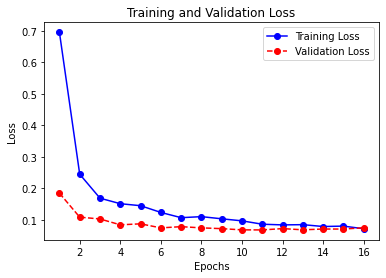

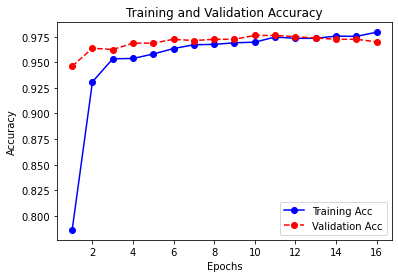

In [20]:
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(1, 100, 100, 3)


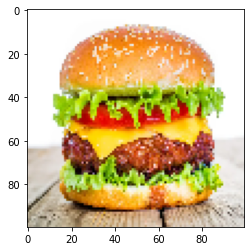

In [46]:
img = load_img("photo.jpg", target_size=(100, 100))
plt.imshow(img)
x = img_to_array(img)
x = preprocess_input(x)
img = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
print(img.shape)

In [47]:
result = model.predict(img)

In [48]:
print(result)
maxindex = np.argmax(result)
print(maxindex)

[[9.992386e-01 7.613875e-04]]
0
